# Stanford 40
### Download the data
You can see the zip files if you click the Files tab (looks like a folder symbol on the left of the screen)

### Unzip it

## Read the train and test splits, combine them and make better splits to help training networks easier.

In [1]:
from collections import Counter
from sklearn.model_selection import train_test_split

keep_stanford40 = ["applauding", "climbing", "drinking", "jumping", "pouring_liquid", "riding_a_bike", "riding_a_horse", 
        "running", "shooting_an_arrow", "smoking", "throwing_frisby", "waving_hands"]
with open('Stanford40/ImageSplits/train.txt', 'r') as f:
    # We won't use these splits but split them ourselves
    train_files = [file_name for file_name in list(map(str.strip, f.readlines())) if '_'.join(file_name.split('_')[:-1]) in keep_stanford40]
    train_labels = ['_'.join(name.split('_')[:-1]) for name in train_files]

with open('Stanford40/ImageSplits/test.txt', 'r') as f:
    # We won't use these splits but split them ourselves
    test_files = [file_name for file_name in list(map(str.strip, f.readlines())) if '_'.join(file_name.split('_')[:-1]) in keep_stanford40]
    test_labels = ['_'.join(name.split('_')[:-1]) for name in test_files]

# Combine the splits and split for keeping more images in the training set than the test set.
all_files = train_files + test_files
all_labels = train_labels + test_labels
train_files, test_files = train_test_split(all_files, test_size=0.1,random_state=0, stratify=all_labels)
train_labels = ['_'.join(name.split('_')[:-1]) for name in train_files]
test_labels = ['_'.join(name.split('_')[:-1]) for name in test_files]
print(f'Train files ({len(train_files)}):\n\t{train_files}')
print(f'Train labels ({len(train_labels)}):\n\t{train_labels}\n'\
      f'Train Distribution:{list(Counter(sorted(train_labels)).items())}\n')
print(f'Test files ({len(test_files)}):\n\t{test_files}')
print(f'Test labels ({len(test_labels)}):\n\t{test_labels}\n'\
      f'Test Distribution:{list(Counter(sorted(test_labels)).items())}\n')
action_categories = sorted(list(set(train_labels)))
print(f'Action categories ({len(action_categories)}):\n{action_categories}')

Train files (2733):
	['drinking_203.jpg', 'smoking_048.jpg', 'running_099.jpg', 'jumping_186.jpg', 'smoking_205.jpg', 'riding_a_bike_090.jpg', 'climbing_184.jpg', 'throwing_frisby_078.jpg', 'applauding_185.jpg', 'throwing_frisby_131.jpg', 'running_241.jpg', 'riding_a_horse_229.jpg', 'throwing_frisby_009.jpg', 'climbing_126.jpg', 'waving_hands_188.jpg', 'shooting_an_arrow_062.jpg', 'riding_a_horse_191.jpg', 'applauding_087.jpg', 'applauding_074.jpg', 'riding_a_bike_181.jpg', 'running_091.jpg', 'riding_a_bike_188.jpg', 'riding_a_bike_027.jpg', 'throwing_frisby_035.jpg', 'climbing_022.jpg', 'applauding_095.jpg', 'waving_hands_024.jpg', 'running_225.jpg', 'climbing_224.jpg', 'riding_a_bike_108.jpg', 'running_050.jpg', 'jumping_089.jpg', 'pouring_liquid_089.jpg', 'climbing_087.jpg', 'applauding_143.jpg', 'jumping_069.jpg', 'waving_hands_039.jpg', 'smoking_019.jpg', 'drinking_030.jpg', 'running_189.jpg', 'climbing_159.jpg', 'climbing_221.jpg', 'drinking_162.jpg', 'drinking_210.jpg', 'riding_

## Make an aditional training and validation split on the Stanford40 set.


In [2]:
train_files, validation_files, train_labels, validation_labels = train_test_split(train_files, train_labels, test_size=0.1,random_state=0, stratify=train_labels)
print(f'Train files ({len(train_files)}):\n\t{train_files}')
print(f'Train labels ({len(train_labels)}):\n\t{train_labels}\n'\
      f'Train Distribution:{list(Counter(sorted(train_labels)).items())}\n')
print(f'Validation files ({len(validation_files)}):\n\t{validation_files}')
print(f'Validation labels ({len(validation_labels)}):\n\t{validation_labels}\n'\
      f'Validation Distribution:{list(Counter(sorted(validation_labels)).items())}\n')

Train files (2459):
	['riding_a_bike_140.jpg', 'running_196.jpg', 'jumping_005.jpg', 'riding_a_bike_282.jpg', 'climbing_130.jpg', 'running_168.jpg', 'waving_hands_168.jpg', 'riding_a_horse_161.jpg', 'climbing_048.jpg', 'pouring_liquid_053.jpg', 'riding_a_bike_292.jpg', 'running_039.jpg', 'drinking_220.jpg', 'drinking_005.jpg', 'smoking_030.jpg', 'riding_a_bike_286.jpg', 'drinking_025.jpg', 'applauding_215.jpg', 'smoking_117.jpg', 'waving_hands_196.jpg', 'applauding_140.jpg', 'riding_a_horse_292.jpg', 'throwing_frisby_013.jpg', 'smoking_172.jpg', 'applauding_005.jpg', 'climbing_210.jpg', 'pouring_liquid_104.jpg', 'riding_a_bike_128.jpg', 'waving_hands_041.jpg', 'riding_a_bike_083.jpg', 'shooting_an_arrow_048.jpg', 'drinking_034.jpg', 'drinking_223.jpg', 'drinking_100.jpg', 'running_188.jpg', 'pouring_liquid_031.jpg', 'smoking_184.jpg', 'jumping_225.jpg', 'jumping_272.jpg', 'riding_a_horse_069.jpg', 'jumping_273.jpg', 'smoking_178.jpg', 'climbing_253.jpg', 'jumping_185.jpg', 'pouring_liq

## Transforming string labels to Index labels of the classname list.

In [3]:
from sklearn.preprocessing import LabelEncoder
# fit the label encoder:
le_stanford = LabelEncoder()
le_stanford.fit(keep_stanford40)

# convert string labels to indexes for all labels:
train_labels = le_stanford.transform(train_labels)
validation_labels = le_stanford.transform(validation_labels)
test_labels = le_stanford.transform(test_labels)


# print the resulting index labels
#print(train_labels)
#print(validation_labels)
#print(test_labels)

### Visualize a photo from the training files and also print its label

An image with the label - 1


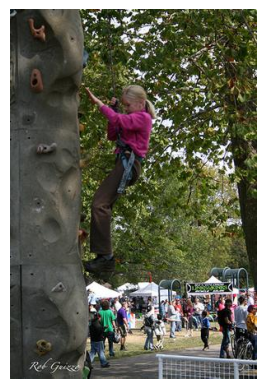

In [4]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

image_no = 4  # change this to a number between [0, 1200] and you can see a different training image
img = cv2.imread(f'Stanford40/JPEGImages/{train_files[image_no]}')
print(f'An image with the label - {train_labels[image_no]}')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Turning the list of image names into a numpy array of images.

In [5]:
import tensorflow as tf
import cv2 as cv
import numpy as np
def loadAndPreprocessImgs(filenames):
    images = []
    for f in filenames:
        path = f'Stanford40/JPEGImages/{f}'
        img = cv.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image_resized = tf.keras.preprocessing.image.smart_resize(img, [112,112])
        image_normalized = image_resized / 255
        images.append(image_normalized)
        
    return np.float32(images)

In [6]:
stanford_train_files = loadAndPreprocessImgs(train_files)
stanford_validation_files = loadAndPreprocessImgs(validation_files)
stanford_test_files = loadAndPreprocessImgs(test_files)

## Task 1: A CNN for the Stanford 40 dataset.

In [13]:
##Import the libraries
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Conv2D, MaxPooling2D, Flatten, Dropout

## Creating the layers
input_layer = Input(shape=(112,112,3))

Conv2D_1 = Conv2D(filters = 12, kernel_size = 3, padding = 'same', activation = 'relu')(input_layer)
MaxPool_1 = MaxPooling2D()(Conv2D_1)

Conv2D_2 = Conv2D(filters = 24, kernel_size = 3, padding = 'same', activation = 'relu')(MaxPool_1)
MaxPool_2 = MaxPooling2D()(Conv2D_2)

Dropout_1 = Dropout(0.3)(MaxPool_2)

Conv2D_3 = Conv2D(filters = 48, kernel_size = 3, padding = 'same', activation = 'relu')(Dropout_1)
MaxPool_3 = MaxPooling2D()(Conv2D_3)

Dropout_2 = Dropout(0.3)(MaxPool_3)

Conv2D_10 = Conv2D(filters = 48, kernel_size = 3, padding = 'same', activation = 'relu')(Dropout_2)
MaxPool_4 = MaxPooling2D()(Conv2D_10)

Flatten_1 = Flatten()(MaxPool_4)

Dense_1 = Dense(50, activation="relu")(Flatten_1)
Dense_3 = Dense(100, activation="relu")(Dense_1)

output_layer= Dense(12, activation=tf.keras.activations.softmax)(Dense_3)

##Defining the model by specifying the input and output layers
model = Model(inputs=input_layer, outputs=output_layer)

## defining the optimiser and loss function
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0002),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## training the model
history = model.fit(stanford_train_files, train_labels, epochs=30,batch_size= 32, validation_data = (stanford_validation_files, validation_labels))

Epoch 1/30
77/77 [==============================] - 5s 53ms/step - loss: 2.4735 - accuracy: 0.0960 - val_loss: 2.4691 - val_accuracy: 0.0985
Epoch 2/30
77/77 [==============================] - 4s 58ms/step - loss: 2.4549 - accuracy: 0.1204 - val_loss: 2.4465 - val_accuracy: 0.1387
Epoch 3/30
77/77 [==============================] - 3s 37ms/step - loss: 2.4064 - accuracy: 0.1537 - val_loss: 2.3662 - val_accuracy: 0.2044
Epoch 4/30
77/77 [==============================] - 3s 38ms/step - loss: 2.3091 - accuracy: 0.1928 - val_loss: 2.2959 - val_accuracy: 0.2044
Epoch 5/30
77/77 [==============================] - 3s 37ms/step - loss: 2.2290 - accuracy: 0.2155 - val_loss: 2.2192 - val_accuracy: 0.2847
Epoch 6/30
77/77 [==============================] - 3s 44ms/step - loss: 2.1303 - accuracy: 0.2660 - val_loss: 2.2530 - val_accuracy: 0.2080
Epoch 7/30
77/77 [==============================] - 3s 43ms/step - loss: 2.0802 - accuracy: 0.2786 - val_loss: 2.1726 - val_accuracy: 0.2555
Epoch 8/30
77

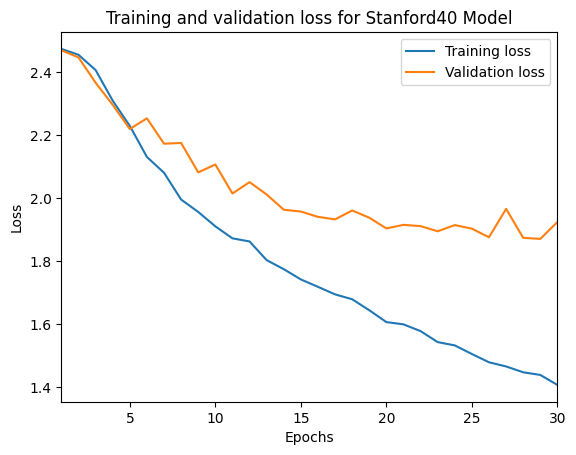

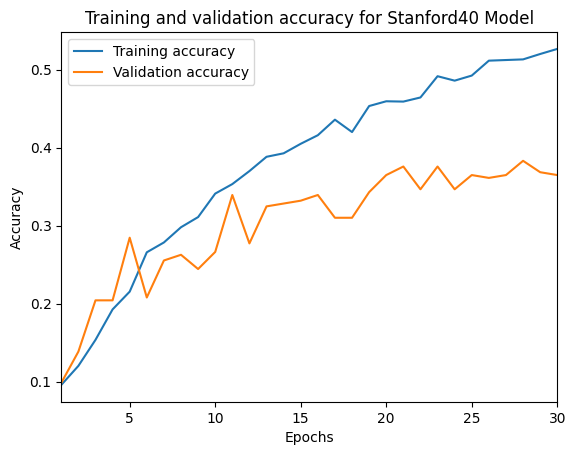

In [14]:
import visualizationPlotting as visplot
visplot.plotPerformance(history, 'Stanford40 Model', 30)

# Human Motion Database 51 (HMDB51)
### Download the dataset

## Split HMD into train and test

In [ ]:
import os
import glob

keep_hmdb51 = ["clap", "climb", "drink", "jump", "pour", "ride_bike", "ride_horse", 
        "run", "shoot_bow", "smoke", "throw", "wave"]

TRAIN_TAG, TEST_TAG = 1, 2
train_files, test_files = [], []
train_labels, test_labels = [], []
split_pattern_name = f"*test_split1.txt"
split_pattern_path = os.path.join('test_train_splits', split_pattern_name)
annotation_paths = glob.glob(split_pattern_path)
for filepath in annotation_paths:
    class_name = '_'.join(filepath.split('\\')[-1].split('_')[:-2])
    if class_name not in keep_hmdb51:
        continue  # skipping the classes that we won't use.
    with open(filepath) as fid:
        lines = fid.readlines()
    for line in lines:
        video_filename, tag_string = line.split()
        tag = int(tag_string)
        if tag == TRAIN_TAG:
            train_files.append(video_filename)
            train_labels.append(class_name)
        elif tag == TEST_TAG:
            test_files.append(video_filename)
            test_labels.append(class_name)

print(f'Train files ({len(train_files)}):\n\t{train_files}')
print(f'Train labels ({len(train_labels)}):\n\t{train_labels}\n'\
      f'Train Distribution:{list(Counter(sorted(train_labels)).items())}\n')
print(f'Test files ({len(test_files)}):\n\t{test_files}')
print(f'Test labels ({len(test_labels)}):\n\t{test_labels}\n'\
      f'Test Distribution:{list(Counter(sorted(test_labels)).items())}\n')
action_categories = sorted(list(set(train_labels)))
print(f'Action categories ({len(action_categories)}):\n{action_categories}')

## And additional split of the training data into a train and validation set


In [ ]:
train_files, validation_files, train_labels, validation_labels = train_test_split(train_files, train_labels, test_size=0.1,random_state=0, stratify=train_labels)
print(f'Train files ({len(train_files)}):\n\t{train_files}')
print(f'Train labels ({len(train_labels)}):\n\t{train_labels}\n'\
      f'Train Distribution:{list(Counter(sorted(train_labels)).items())}\n')
print(f'Validation files ({len(validation_files)}):\n\t{validation_files}')
print(f'Validation labels ({len(validation_labels)}):\n\t{validation_labels}\n'\
      f'Validation Distribution:{list(Counter(sorted(validation_labels)).items())}\n')

## Transforming the string labels to index labels of the classname list.

In [ ]:
from sklearn.preprocessing import LabelEncoder
# fit the label encoder:
le_hmdb51 = LabelEncoder()
le_hmdb51.fit(keep_hmdb51)

# convert string labels to indexes for all labels:
train_labels = le_hmdb51.transform(train_labels)
validation_labels = le_hmdb51.transform(validation_labels)
test_labels = le_hmdb51.transform(test_labels)


# print the resulting index labels
#print(train_labels)
#print(validation_labels)
#print(test_labels)